# Gaussian

## Q: What is the multi-variate Gaussian distribution?

The multi-variate Gaussian distribution is said to be "non-degenerate" when the symmetric covariance matrix $\Sigma$ is positive definite.The probability density funcution of $X$ is given

$$f(X) = \dfrac{1}{(\sqrt{2\pi})^n \sqrt{|\Sigma_X|}}exp\left(-\dfrac{1}{2}(x-\mu_X)^T\Sigma_X^{-1}(x-\mu_X)\right)$$

$X = [X_1,…X_n]^T:\quad n-$vector \
$\mu_X:$ the mean vector of $X$ \
$\Sigma_X:$ covariance matrix of $X$

When $X$ is normal distribution, $\mu_X=0, \quad \Sigma_X=I$.\
$f(X)$ is represent

$$f(X) = \dfrac{1}{(\sqrt{2\pi})^n }exp\left(-\dfrac{1}{2}x^Tx\right)$$

## Q: How is the bivariate distribution a special case?

Bivariate distribution is set

$$f_{XY}(x,y) = \dfrac{1}{2\pi\sigma_X\sigma_Y\sqrt{1-\rho^2}}exp\left(-\dfrac{z}{2(1-\rho^2)}\right)$$

$$z=\dfrac{(x-\mu_X)}{\sigma_X^2}-\dfrac{2\rho(x-\mu_X)(y-\mu_Y)}{\sigma_X\sigma_Y}+\dfrac{(y-\mu_Y)}{\sigma_Y^2}
$$

The below code shows the case that $X$ and $Y$ are independent ($\mu_X = \mu_Y =5, \quad \sigma_X = \sigma_Y=1, \quad \sigma_{XY}=0$)

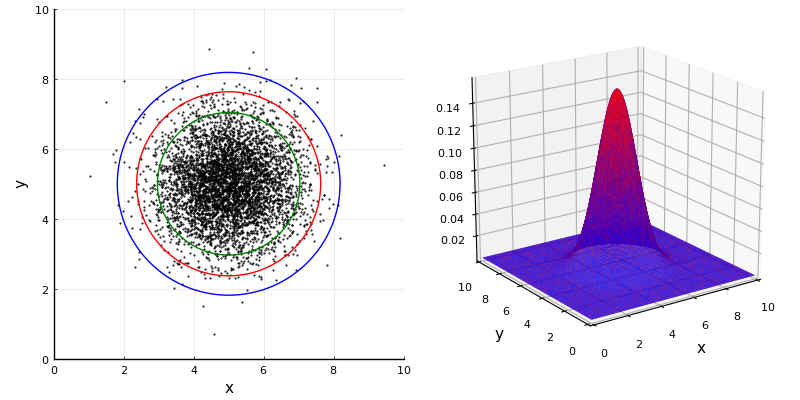

In [1]:
using Distributions, Plots; pyplot()

meanVect = [5,5]
covMat = [1 0;
          0 1]

biNorm = MvNormal(meanVect,covMat)

N=5*10^3
points = rand(MvNormal(meanVect,covMat),N)

support = 0:0.04:10
z = [ pdf(biNorm,[x,y]) for y in support, x in support ]

p1 = scatter(points[1,:], points[2,:], ms=0.5, c=:black, legend=:none)
p1 = contour!(support, support, z,
                levels=[0.001, 0.005, 0.02], c=[:blue, :red, :green],
                xlims=(0,10), ylims=(0,10), ratio=:equal, legend=:none,
                xlabel="x", ylabel="y")

p2 = surface(support, support, z, lw=0.05, c=cgrad([:blue, :red]),
                 legend=:none, xlabel="x", ylabel="y",camera=(-35,20))

plot(p1, p2, size=(800, 400))

The plots are distributed dependently based on the each variance.

On the other hand, the below code shows the case that $X$ and $Y$ are dependent ($\mu_X = \mu_Y =5, \quad \sigma_X = \sigma_Y=1, \quad \sigma_{XY}=0.6$)

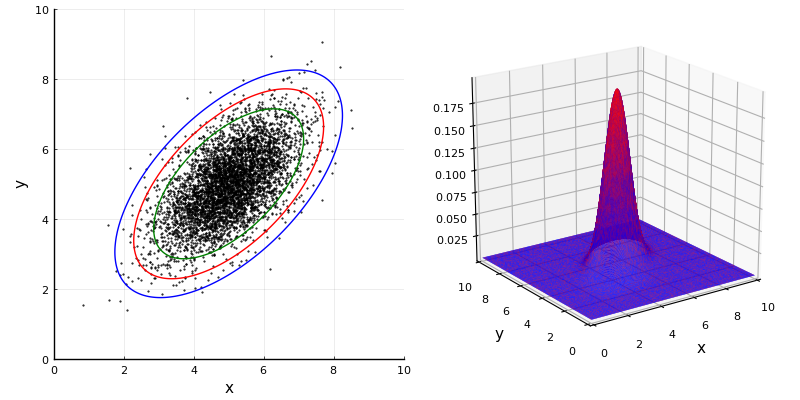

In [2]:
using Distributions, Plots; pyplot()

meanVect = [5,5]
covMat = [1 0.6;
          0.6 1]

biNorm = MvNormal(meanVect,covMat)

N=5*10^3
points = rand(MvNormal(meanVect,covMat),N)

support = 0:0.04:10
z = [ pdf(biNorm,[x,y]) for y in support, x in support ]

p1 = scatter(points[1,:], points[2,:], ms=0.5, c=:black, legend=:none)
p1 = contour!(support, support, z,
                levels=[0.001, 0.005, 0.02], c=[:blue, :red, :green],
                xlims=(0,10), ylims=(0,10), ratio=:equal, legend=:none,
                xlabel="x", ylabel="y")

p2 = surface(support, support, z, lw=0.05, c=cgrad([:blue, :red]),
                 legend=:none, xlabel="x", ylabel="y",camera=(-35,20))

plot(p1, p2, size=(800, 400))

If $\sigma_{XY}=-0.6$, the slope change to the negative direction.

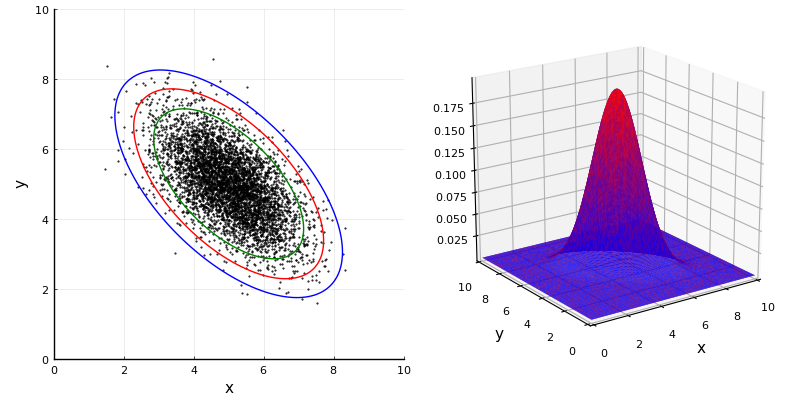

In [3]:
using Distributions, Plots; pyplot()

meanVect = [5,5]
covMat = [1 -0.6;
          -0.6 1]

biNorm = MvNormal(meanVect,covMat)

N=5*10^3
points = rand(MvNormal(meanVect,covMat),N)

support = 0:0.04:10
z = [ pdf(biNorm,[x,y]) for y in support, x in support ]

p1 = scatter(points[1,:], points[2,:], ms=0.5, c=:black, legend=:none)
p1 = contour!(support, support, z,
                levels=[0.001, 0.005, 0.02], c=[:blue, :red, :green],
                xlims=(0,10), ylims=(0,10), ratio=:equal, legend=:none,
                xlabel="x", ylabel="y")

p2 = surface(support, support, z, lw=0.05, c=cgrad([:blue, :red]),
                 legend=:none, xlabel="x", ylabel="y",camera=(-35,20))

plot(p1, p2, size=(800, 400))

The plots are distributed with taking the affect of covariance.\
When $\rho =0$ bivariate distribution is distributed independently by the products of $f(x)$ and $f(y)$.

## Q: How to carry out computations with Gaussian distributions?

The probability density function with Gaussian distribution is obtained in arvituary matrix $X$ from the below code

In [4]:
using LinearAlgebra

X = [0.1 0.4 0.6;
     0.2 0.5 0.7;
     0.8 1 1.5]

function f(X)
    m = length(X[:,1])
    deX = (I-ones(m,m)/m)*X
    covmat = X'X

    Q = eigvecs(covmat)
    Λ= Diagonal(eigvals(covmat))
    Y = Q'*deX

    Cov = Y'*inv(Λ)*Y

    (2*pi)^(-m/2)*det(covmat)^(-1/2) * exp(-Cov/2)
end

f(X)

3×3 Array{Float64,2}:
  4.10952  -1.38849  -2.2109
 -1.38849   4.60227  -1.8257
 -2.2109   -1.8257    2.79084

In [5]:
using HCubature

M = 4.5
maxD = 10

f(x) = (2*pi)^(-length(x)/2) * exp(-(1/2)*x'x)

for n in 1:maxD
    a = -M*ones(n)
    b = M*ones(n)
    I,e = hcubature(f, a, b, maxevals = 10^7)
    println("n = $(n), integral = $(I), error (estimate) = $(e)")
end

n = 1, integral = 0.9999932046537506, error (estimate) = 4.365848932375016e-10
n = 2, integral = 0.9999864091389514, error (estimate) = 1.487907641465839e-8
n = 3, integral = 0.9999796140804286, error (estimate) = 1.4899542976517278e-8
n = 4, integral = 0.9999728074508313, error (estimate) = 4.4447365681340567e-7
n = 5, integral = 0.999965936103044, error (estimate) = 2.3294669134930872e-5
n = 6, integral = 0.9999639124757695, error (estimate) = 0.0003937954462609516
n = 7, integral = 1.0001623151630603, error (estimate) = 0.0031506650163379375
n = 8, integral = 1.0074827348433597, error (estimate) = 0.023275741664597813
n = 9, integral = 1.2233043761463291, error (estimate) = 0.3731125349186622
n = 10, integral = 0.42866209316161163, error (estimate) = 0.22089760603668282


Gaussian distribution is calculated with

$$f(X) = \dfrac{1}{(\sqrt{2\pi})^n \sqrt{|\Sigma_X|}}exp\left(-\dfrac{1}{2}(x-\mu_X)^T\Sigma_X^{-1}(x-\mu_X)\right)$$

How is linear algebra applied to the calculation for gaussian distribution?

$\Sigma_X$ is decomposed as

$\Sigma_X = Q\Lambda Q^T$

In [6]:
X = [0.1 0.4 0.6;
     0.2 0.5 0.7;
     0.8 1 1.5]
covmat = X'X

3×3 Array{Float64,2}:
 0.69  0.94  1.4
 0.94  1.41  2.09
 1.4   2.09  3.1

In [7]:
Q = eigvecs(covmat)

3×3 Array{Float64,2}:
 -0.0571499   0.933556  -0.353845
 -0.81561    -0.248059  -0.52273
  0.575772   -0.258726  -0.775595

In [8]:
Q*Q'

3×3 Array{Float64,2}:
 1.0          1.66533e-16  0.0
 1.66533e-16  1.0          5.55112e-17
 0.0          5.55112e-17  1.0

In [9]:
Λ= Diagonal(eigvals(covmat))

3×3 Diagonal{Float64,Array{Float64,1}}:
 0.000450048   ⋅         ⋅ 
  ⋅           0.052233   ⋅ 
  ⋅            ⋅        5.14732

In [10]:
Q*Λ*Q'

3×3 Array{Float64,2}:
 0.69  0.94  1.4
 0.94  1.41  2.09
 1.4   2.09  3.1

In [11]:
covmat-Q*Λ*Q'

3×3 Array{Float64,2}:
 -1.11022e-16  -5.55112e-16  2.22045e-16
 -5.55112e-16  -1.55431e-15  0.0
  2.22045e-16   0.0          0.0

$\Sigma_X$ fits to $Q\Lambda Q^T$

Let $Y = Q^T(x-\mu_X)$

In [12]:
m = length(X[:,1])
deX = (I-ones(m,m)/m)*X

3×3 Array{Float64,2}:
 -0.266667  -0.233333  -0.333333
 -0.166667  -0.133333  -0.233333
  0.433333   0.366667   0.566667

In [13]:
Y = Q'*deX

3×3 Array{Float64,2}:
  0.400676   0.3332     0.53563
 -0.31972   -0.279621  -0.399916
 -0.154611  -0.132124  -0.199585

we can say $(x-\mu_X)^T\Lambda^{-1}(x-\mu_X)=X^TQ\Lambda^{-1}Q^TX= Y^T\Lambda^{-1}Y$

In [14]:
Y'*inv(Λ)*Y

3×3 Array{Float64,2}:
 358.682  298.362  479.323
 298.362  248.189  398.707
 479.323  398.707  640.556

In [15]:
deX'*Q*inv(Λ)*Q'*deX

3×3 Array{Float64,2}:
 358.682  298.362  479.323
 298.362  248.189  398.707
 479.323  398.707  640.556

As a result, Gaussian distribution can be computed with $Q$ of the covariance matrix of $X$.

## Q: How to generate random variables from Gaussian distributions using Cholesky factorizations?

The code generates the Gaussian distribution with Cholosky factorization

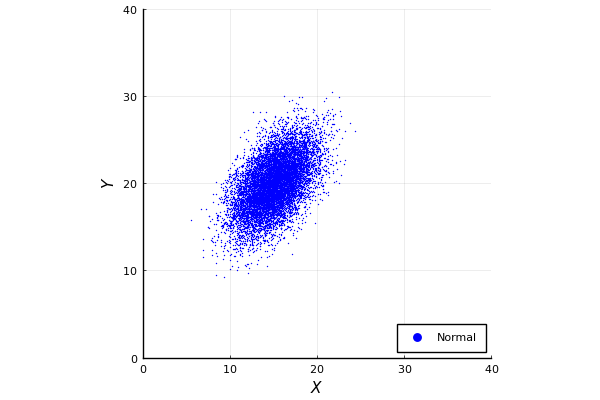

In [16]:
using Distributions, LinearAlgebra, LaTeXStrings, Random, Plots; pyplot()
Random.seed!(1)

N = 10^4

SigY = [ 6 4 ;
         4 9] #desired covariance matrix
muY = [15 ;  
       20] #desired mean vector
A = cholesky(SigY).L

rngGens = [()->rand(Normal())]
#three types of random variables with mean = 0, var (and hence std) = 1
#Hence the covariance of a pair of such RVs is the identity

rv(rg) = A*[rg(),rg()] + muY  #Affine transformation Y = AX+b
    
data = [[rv(r) for _ in 1:N] for r in rngGens]


scatter(first.(data[1]), last.(data[1]), c=:blue, ms=1, msw=0, label="Normal",
    xlims=(0,40), ylims=(0,40), legend=:bottomright, ratio=:equal,
    xlabel=L"X", ylabel=L"Y")

Given $X\sim N(0,I)$

The aim of Cholesky decomposition in the topic is to find $L$ whichi is satisfy $\Sigma_Y = LL^T$

In [17]:
SigY

2×2 Array{Int64,2}:
 6  4
 4  9

$cholosky().L$ make lower triangular matrix

In [18]:
L = cholesky(SigY).L

2×2 LowerTriangular{Float64,Array{Float64,2}}:
 2.44949   ⋅ 
 1.63299  2.51661

In [19]:
ΣY = L*L' 

2×2 Array{Float64,2}:
 6.0  4.0
 4.0  9.0

The relationship between $Y$ and  $X$ is

$$Y=LX+\mu_Y$$

Hence, random variables Y can be generated with $L$ which is generated from Cholisky dicomposition of the covariance matrix of Y.